## Proyecto 1: Modelos de Regresión Lineal
#### Gabriela - 
#### Giovanni Santos - 22523
#### Santiago

### Análisis Exploratorio

##### Con el propósito de entender mejor los datos del conjunto de datos y lograr predecir el precio de los inmuebles, podemos hacer un análisis exploratorio 

#### Importar las librerías a utilizar

In [1]:
import pandas as pd
from ydata_profiling import ProfileReport    
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from kneed import KneeLocator
import numpy as np
import scipy.stats as stats
from sklearn.model_selection import train_test_split





%matplotlib inline

#### Leer archivo de datos

In [18]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")


#### Para ver información general del dataset podemos utilizar head, info y describe. 

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Podemos observar una serie de características sobre el data set. Primero, que el data set tiene 81 columnas y 1460 datos. Además, nos damos cuenta de la columna que nos interesa principalmente para nuestra predicción es SalePrice que indica el precio de venta de la propiedad en dolares y, por lo tanto, es la variable objetivo. Podemos ver que el precio minimo de una casa no es de 0, por lo que no hay que tomarlo en cuenta. Mediante info nos damos cuenta que cada casa tiene características diferentes, como que no todas tienen piscina, y que hay valores faltantes para múltiples casas. 

Podemos seguir el análisis al idear una serie de preguntas sobre lo que nos parece interesante investigar. Ya respondimos cuestiones como si hay datos faltantes o cual es la variable objetivo. En consecuencia, nos podemos preguntar, ¿Cómo se distribuye el precio de las viviendas?

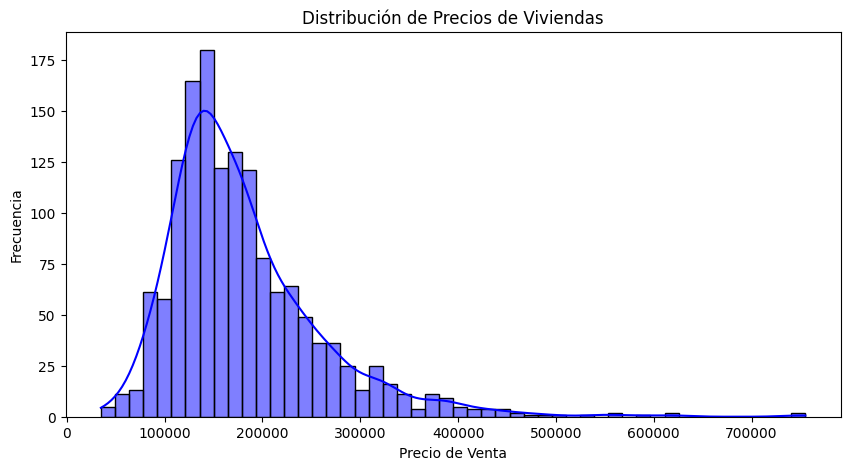

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df_train["SalePrice"], bins=50, kde=True, color='blue')
plt.xlabel("Precio de Venta")
plt.ylabel("Frecuencia")
plt.title("Distribución de Precios de Viviendas")
plt.show()

Podemos observar que el precio de venta con mayor frecuencia está entre 100000 y 200000 dolares y que se tiene una asimetría positiva. Para seguir con el análisis, podemos pensar cuáles son las otras variables que nos interesan y cuál es su relación con SalePrice. Para hacerlo, podemos ver como factores como el tamaño de la casa, la calidad de vivienda y el año de construcción influyen en el precio. Se nota que calidad de vivienda influye directamente en el precio, siendo las de mayor calidad las que más tienen precio de venta. Por otro lado, el tamaño de la casa influye en el incremento del precio, pero se tienen outliers en donde no siempre sucede que tenemos que manejar más adelante. Adicionalmente, se observa que las viviendas con precio más alto son las más recientes. 


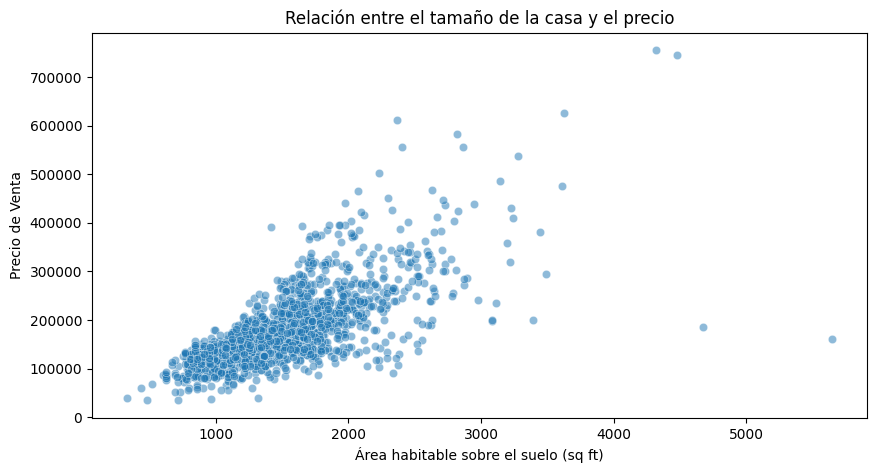

/var/folders/c4/s77cmlbj0kvc81_ktl3p92vm0000gn/T/ipykernel_66396/2311372623.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train["OverallQual"], y=df_train["SalePrice"], palette="viridis")


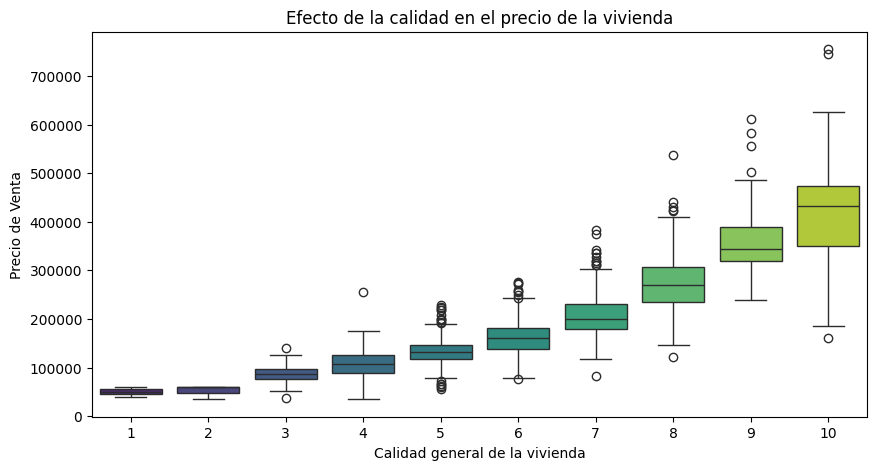

/var/folders/c4/s77cmlbj0kvc81_ktl3p92vm0000gn/T/ipykernel_66396/2311372623.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_train["YearBuilt"], y=df_train["SalePrice"], palette="viridis")


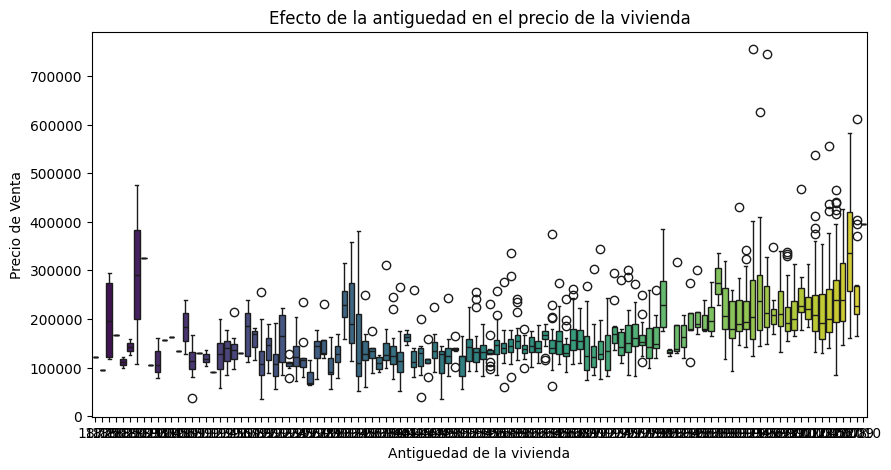

In [9]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df_train["GrLivArea"], y=df_train["SalePrice"], alpha=0.5)
plt.xlabel("Área habitable sobre el suelo (sq ft)")
plt.ylabel("Precio de Venta")
plt.title("Relación entre el tamaño de la casa y el precio")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_train["OverallQual"], y=df_train["SalePrice"], palette="viridis")
plt.xlabel("Calidad general de la vivienda")
plt.ylabel("Precio de Venta")
plt.title("Efecto de la calidad en el precio de la vivienda")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df_train["YearBuilt"], y=df_train["SalePrice"], palette="viridis")
plt.xlabel("Antiguedad de la vivienda")
plt.ylabel("Precio de Venta")
plt.title("Efecto de la antiguedad en el precio de la vivienda")
plt.show()



Para confirmar esto podemos ver la correlación de variables con el precio, esto se puede hacer mediante un mapa de calor. Al ver las 10 variables que tienen mayor correlación con el precio de venta de la vivienda podemos observar que factores que no habíamos analizado antes como Garage y Total Rooms Above Grade son importantes. 

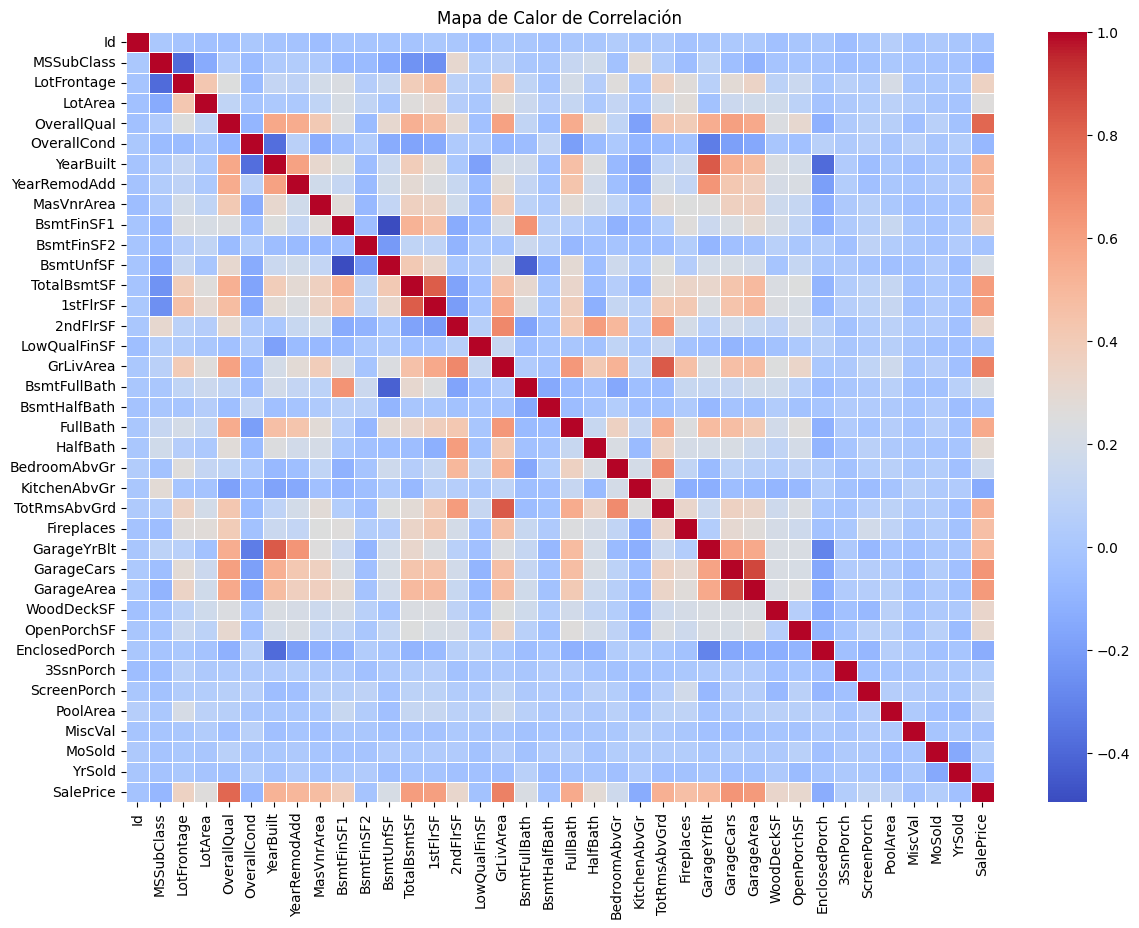

In [10]:
numeric_cols = df_train.select_dtypes(include=["number"])
plt.figure(figsize=(14,10))
sns.heatmap(numeric_cols.corr(), cmap="coolwarm", annot=False, fmt=".2f", linewidths=0.5)
plt.title("Mapa de Calor de Correlación")
plt.show()


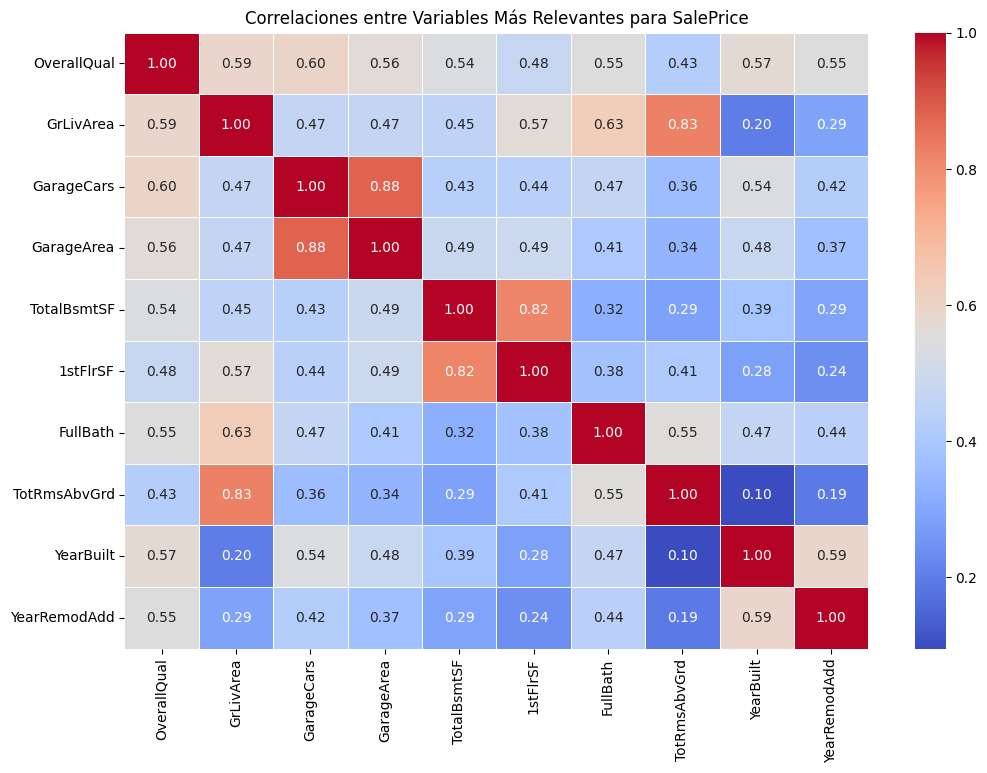

In [11]:
correlation = numeric_cols.corr()["SalePrice"].sort_values(ascending=False)
high_corr_vars = correlation[1:11].index  
plt.figure(figsize=(12,8))
sns.heatmap(numeric_cols[high_corr_vars].corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlaciones entre Variables Más Relevantes para SalePrice")
plt.show()

Algo que nos puede servir es tener la distribución de las variables que nos pueden interesar en el futuro. 

array([[<Axes: title={'center': 'Id'}>,
        <Axes: title={'center': 'MSSubClass'}>,
        <Axes: title={'center': 'LotFrontage'}>,
        <Axes: title={'center': 'LotArea'}>,
        <Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'YearRemodAdd'}>,
        <Axes: title={'center': 'MasVnrArea'}>,
        <Axes: title={'center': 'BsmtFinSF1'}>,
        <Axes: title={'center': 'BsmtFinSF2'}>,
        <Axes: title={'center': 'BsmtUnfSF'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': '1stFlrSF'}>,
        <Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'LowQualFinSF'}>,
        <Axes: title={'center': 'GrLivArea'}>,
        <Axes: title={'center': 'BsmtFullBath'}>],
       [<Axes: title={'center': 'BsmtHalfBath'}>,
        <Axes: title={'center': 'FullBath'}>,
        <Axes: title={'center': 'HalfBath'}>,

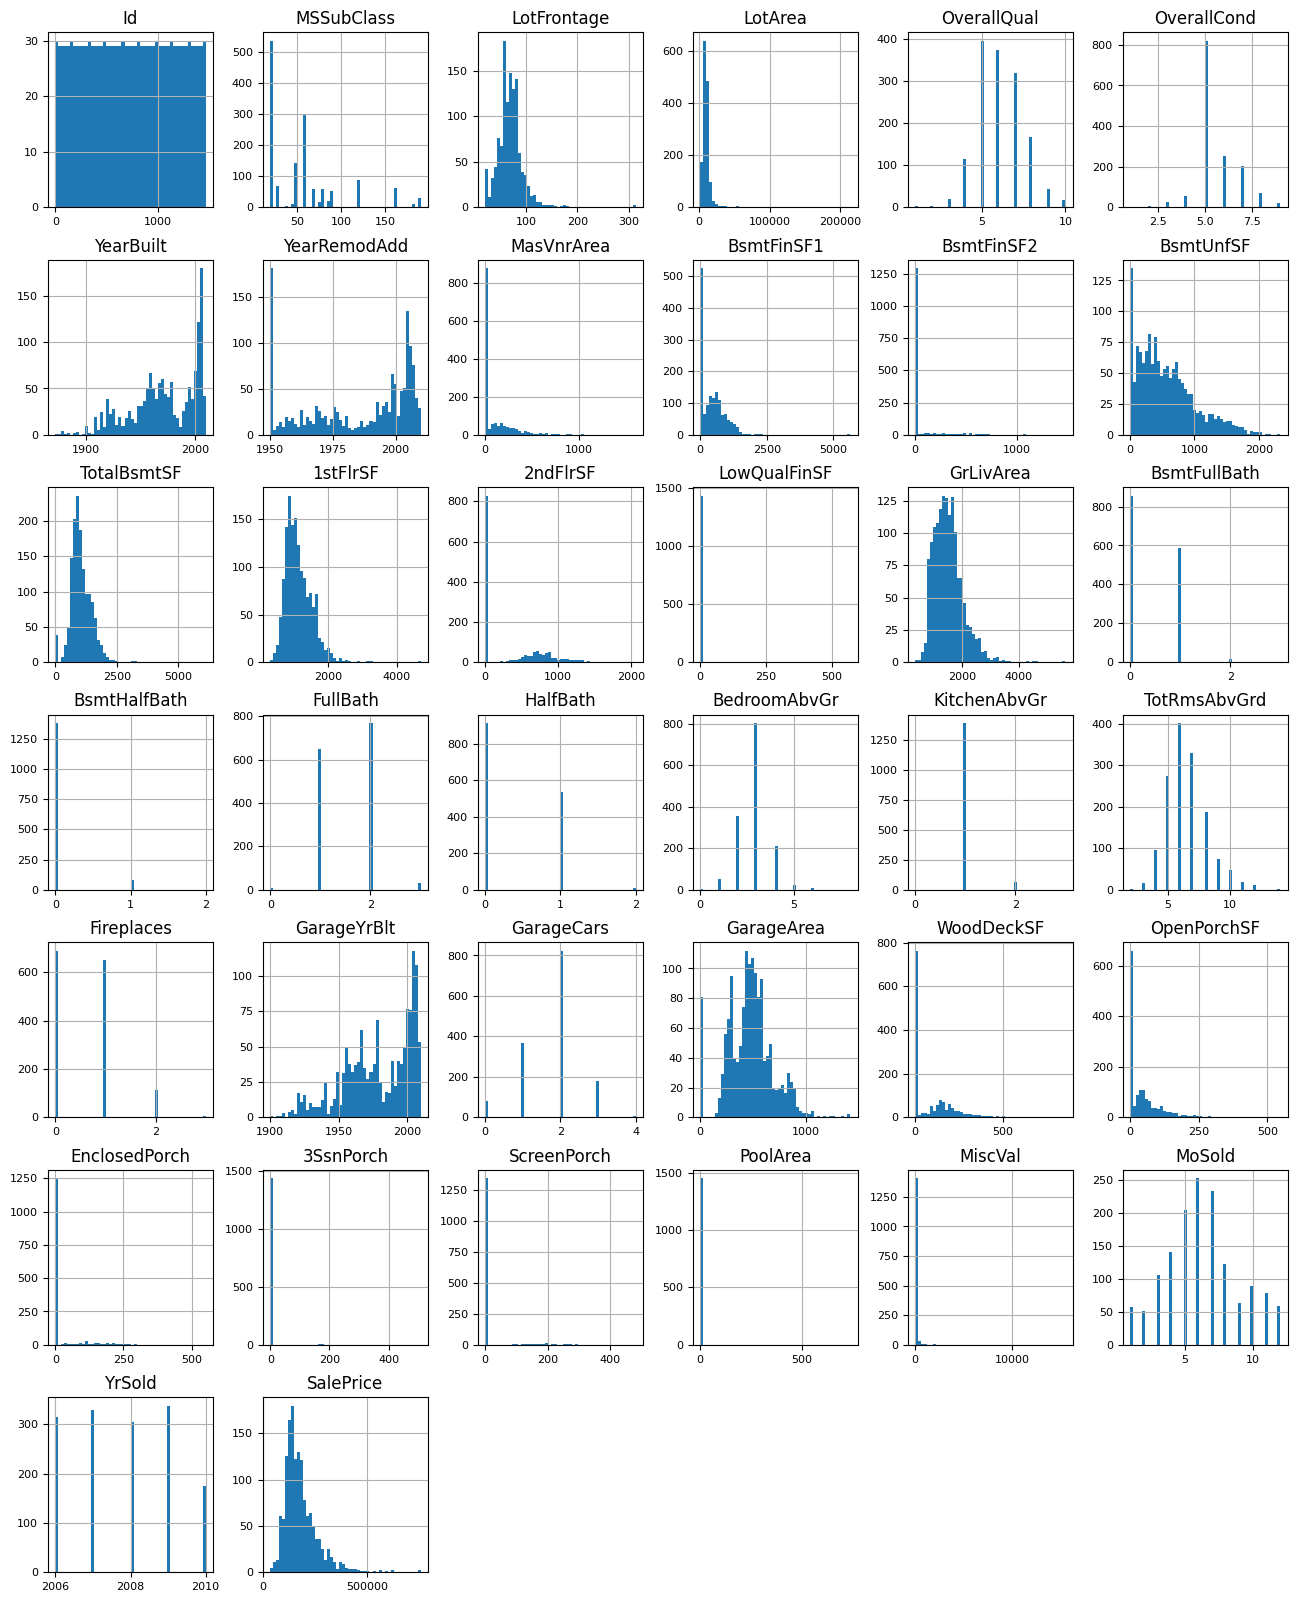

In [12]:
df_train.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)

Ahora debemos dividir el set de datos preprocesados en dos conjuntos: Entrenamiento y prueba, para hacerlo hay que empezar el pre procesamiento de datos. Como sabemos que hay datos faltantes, podemos observar cual es el total de estos y después hacer una decisión sobre cuales eliminar. 

In [ ]:
##podemos realizar el split con una división 80% para entrenamiento y 20% para prueba.
train_set, test_set = train_test_split(df_train, test_size=0.2, random_state=42)

In [ ]:
missing_values = train_set.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Valores faltantes por columna:")
print(missing_values)

Valores faltantes por columna:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


Podemos eliminar todos los datos faltantes ya que no tienen correlación importante con SalePrice

In [ ]:
missing_values = train_set.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
print("Valores faltantes por columna:")
print(missing_values)
train_set = train_set.drop(columns=missing_values.index)
print("\nResultado:")
print(train_set.columns)

Valores faltantes por columna:
PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

Resultado:
Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea',

Ahora podemos aplicar el escalamiento de características, específicamente, al estandarizar los valores de SalePrice. Primero, observamos que teníamos outliers que tenemos que eliminar. Después, podemos proceder a estandarizar SalePrice. En consiguiente, podemos hacer un gráfico de probabilidad para verificar si tiene una distribución normal. 

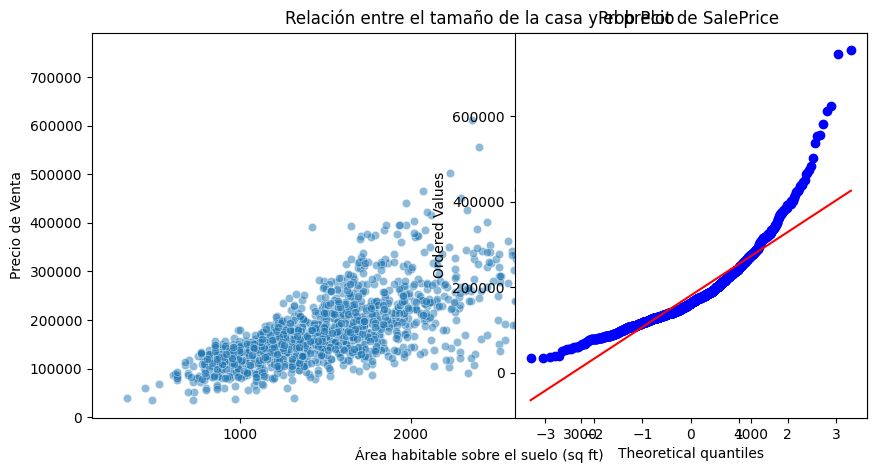

In [ ]:
train_set = train_set.drop(train_set[(train_set['GrLivArea']>4000) & (train_set['SalePrice']<200000)].index)
plt.figure(figsize=(10, 5))
sns.scatterplot(x=train_set["GrLivArea"], y=train_set["SalePrice"], alpha=0.5)
plt.xlabel("Área habitable sobre el suelo (sq ft)")
plt.ylabel("Precio de Venta")
plt.title("Relación entre el tamaño de la casa y el precio")

plt.subplot(1, 2, 2)
stats.probplot(train_set["SalePrice"], dist="norm", plot=plt)
plt.title("Prob Plot de SalePrice ")

plt.show()

Como no tiene la distribución que queremos, podemos aplicar una transformación logarítmica y luego realizar la estandarización de SalePrice. 

In [ ]:
train_set["SalePrice"] = np.log1p(train_set["SalePrice"])

scaler = StandardScaler()
train_set["SalePrice"] = scaler.fit_transform(train_set[["SalePrice"]])


Podemos verificarlo al mostrar de nuevo el gráfico de probabilidad. Este nos muestra que ahora tenemos una distribución normal en su mayoría. 

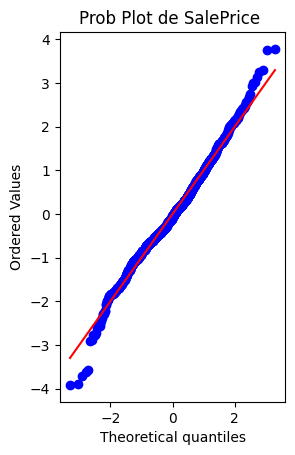

In [ ]:
plt.subplot(1, 2, 2)
stats.probplot(train_set["SalePrice"], dist="norm", plot=plt)
plt.title("Prob Plot de SalePrice ")

plt.show()